In [2]:
import pandas as pd

df=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
x_train=df.drop(['label'],axis='columns')
y_train=df['label']

In [4]:
y_train.value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

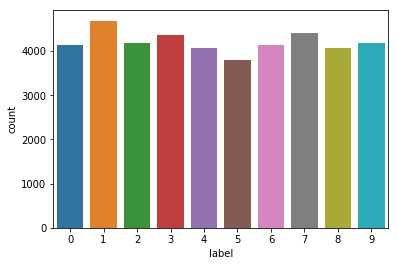

In [6]:
sns.countplot(y_train)

In [7]:
df.isnull().sum()

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
pixel5      0
pixel6      0
pixel7      0
pixel8      0
pixel9      0
pixel10     0
pixel11     0
pixel12     0
pixel13     0
pixel14     0
pixel15     0
pixel16     0
pixel17     0
pixel18     0
pixel19     0
pixel20     0
pixel21     0
pixel22     0
pixel23     0
pixel24     0
pixel25     0
pixel26     0
pixel27     0
pixel28     0
           ..
pixel754    0
pixel755    0
pixel756    0
pixel757    0
pixel758    0
pixel759    0
pixel760    0
pixel761    0
pixel762    0
pixel763    0
pixel764    0
pixel765    0
pixel766    0
pixel767    0
pixel768    0
pixel769    0
pixel770    0
pixel771    0
pixel772    0
pixel773    0
pixel774    0
pixel775    0
pixel776    0
pixel777    0
pixel778    0
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64

In [8]:
x_train=x_train/255  #We perform a grayscale normalization to reduce the effect of illumination's differences.
test=test/255       #Moreover the CNN converg faster on [0..1] data than on [0..255].

In [10]:
# Reshape image in 3 dimensions (height = 28px, width = 28px , canal = 1)
x_train = x_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)

In [11]:
#Train and test images (28px x 28px) has been stock into pandas.
#Dataframe as 1D vectors of 784 values. We reshape all data to 28x28x1 3D matrices.
#Keras requires an extra dimension in the end which correspond to channels.
#MNIST images are gray scaled so it use only one channel.
#For RGB images, there is 3 channels, we would have reshaped 784px vectors to 28x28x3 3D matrices

In [14]:
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
# Encode labels to one hot vectors (ex : 2 -> [0,0,1,0,0,0,0,0,0,0])
y_train = to_categorical(y_train, num_classes = 10)

Using TensorFlow backend.


In [15]:
#Labels are 10 digits numbers from 0 to 9. 
#We need to encode these lables to one hot vectors (ex : 2 -> [0,0,1,0,0,0,0,0,0,0]).


In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train,X_val,Y_train,Y_val=train_test_split(x_train,y_train,test_size=0.1)

In [18]:
# splited the train set in two parts : a small fraction (10%) became the validation set which the model is evaluated and the rest (90%) is used to train the model.

In [19]:
import keras
from keras.models import Sequential

In [20]:
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D

In [21]:
# Set the CNN model 
# my CNN architechture is In -> [[Conv2D->relu]*2 -> MaxPool2D -> Dropout]*2 -> Flatten -> Dense -> Dropout -> Out

model = Sequential()

In [22]:
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))

model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))

model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

In [23]:
model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

In [25]:
# Define the optimizer
from keras.optimizers import RMSprop
optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

In [26]:
# Compile the model
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])



In [27]:
# Set a learning rate annealer
from keras.callbacks import ReduceLROnPlateau
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [29]:
# Without data augmentation i obtained an accuracy of 0.98114
history = model.fit(X_train, Y_train, batch_size = 86, epochs = 30, 
          validation_data = (X_val, Y_val), verbose = 2)

Train on 37800 samples, validate on 4200 samples
Epoch 1/30
 - 225s - loss: 0.2372 - acc: 0.9236 - val_loss: 0.0704 - val_acc: 0.9790
Epoch 2/30
 - 226s - loss: 0.0724 - acc: 0.9784 - val_loss: 0.0520 - val_acc: 0.9826
Epoch 3/30
 - 220s - loss: 0.0566 - acc: 0.9835 - val_loss: 0.0382 - val_acc: 0.9874
Epoch 4/30
 - 220s - loss: 0.0463 - acc: 0.9860 - val_loss: 0.0359 - val_acc: 0.9888
Epoch 5/30
 - 223s - loss: 0.0440 - acc: 0.9875 - val_loss: 0.0377 - val_acc: 0.9893
Epoch 6/30
 - 224s - loss: 0.0386 - acc: 0.9877 - val_loss: 0.0309 - val_acc: 0.9907
Epoch 7/30
 - 224s - loss: 0.0390 - acc: 0.9890 - val_loss: 0.0647 - val_acc: 0.9855
Epoch 8/30
 - 224s - loss: 0.0372 - acc: 0.9890 - val_loss: 0.0447 - val_acc: 0.9900
Epoch 9/30
 - 223s - loss: 0.0351 - acc: 0.9908 - val_loss: 0.0346 - val_acc: 0.9900
Epoch 10/30
 - 221s - loss: 0.0342 - acc: 0.9907 - val_loss: 0.0324 - val_acc: 0.9914
Epoch 11/30
 - 220s - loss: 0.0355 - acc: 0.9902 - val_loss: 0.0468 - val_acc: 0.9867
Epoch 12/30
 -

In [36]:
results = model.predict(test)

In [37]:
# select the indix with the maximum probability
#results = np.argmax(results,axis = 1)

In [38]:
#results = pd.Series(results,name="Label")

In [39]:
#submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)

In [40]:
import numpy as np
array = np.arange(28000)
for i in range(0,28000):
    array[i]=np.argmax(results[i]) 

In [41]:
sample=pd.read_csv('predictions.csv')
sample['Label']=array

In [42]:
sample.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3


In [43]:
sample.to_csv('sample.csv',index=False)

In [44]:


# With data augmentation to prevent overfitting (accuracy 0.99286)

#datagen = ImageDataGenerator(
 #       featurewise_center=False,  # set input mean to 0 over the dataset
  #      samplewise_center=False,  # set each sample mean to 0
   #     featurewise_std_normalization=False,  # divide inputs by std of the dataset
    #    samplewise_std_normalization=False,  # divide each input by its std
     #   zca_whitening=False,  # apply ZCA whitening
      #  rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
       # zoom_range = 0.1, # Randomly zoom image 
        #width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        #height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        #horizontal_flip=False,  # randomly flip images
        #vertical_flip=False)  # randomly flip images


#datagen.fit(X_train)



In [45]:
# Fit the model
#history = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
 #                             epochs = epochs, validation_data = (X_val,Y_val),
 #                             verbose = 2, steps_per_epoch=X_train.shape[0] // batch_size
 #                             , callbacks=[learning_rate_reduction])

In [46]:


# Plot the loss and accuracy curves for training and validation 
#fig, ax = plt.subplots(2,1)
#ax[0].plot(history.history['loss'], color='b', label="Training loss")
#ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
#legend = ax[0].legend(loc='best', shadow=True)

#ax[1].plot(history.history['acc'], color='b', label="Training accuracy")
#ax[1].plot(history.history['val_acc'], color='r',label="Validation accuracy")
#legend = ax[1].legend(loc='best', shadow=True)



In [48]:
# Look at confusion matrix 

#def plot_confusion_matrix(cm, classes,
#                          normalize=False,
#                          title='Confusion matrix',
#                          cmap=plt.cm.Blues):
    
    #This function prints and plots the confusion matrix.
    #Normalization can be applied by setting `normalize=True`.

#    plt.imshow(cm, interpolation='nearest', cmap=cmap)
#    plt.title(title)
#    plt.colorbar()
#    tick_marks = np.arange(len(classes))
#    plt.xticks(tick_marks, classes, rotation=45)
#    plt.yticks(tick_marks, classes)

#    if normalize:
#       cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

 #   thresh = cm.max() / 2.
#    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
#        plt.text(j, i, cm[i, j],
#                 horizontalalignment="center",
#                 color="white" if cm[i, j] > thresh else "black")

#    plt.tight_layout()
#    plt.ylabel('True label')
#    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
#Y_pred = model.predict(X_val)
# Convert predictions classes to one hot vectors 
#Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
#Y_true = np.argmax(Y_val,axis = 1) 
# compute the confusion matrix
#confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
#plot_confusion_matrix(confusion_mtx, classes = range(10)) 